In [206]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [207]:
housing_data = pd.read_csv("../../2/data/train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_data["total_area"] = (
    housing_data["1stFlrSF"] + housing_data["2ndFlrSF"] + housing_data["TotalBsmtSF"]
)

## Linear vs. Quadratic Relationship

In [27]:
def plot_area_vs_price(housing_data):
    fig, ax = plt.subplots()
    ax.scatter(
        x=housing_data["total_area"],
        y=housing_data["SalePrice"],
        alpha=0.25,
        edgecolors="none",
    )
    formatter = lambda x, pos: f"${int(x/1000):,}K"
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel("Sale Price")
    ax.set_xlabel("Total Area (Square Feet)")
    return ax

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [186]:
def col_vs_price(housing_data, col, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(
        x=housing_data[col], y=housing_data["SalePrice"], alpha=0.25, edgecolors="none"
    )
    formatter = lambda x, pos: f"${int(x/1000):,}K"
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel("Sale Price")
    ax.set_xlabel(col)
    return ax

In [109]:
def linear_vs_quadratic_plot(housing_data, column):
    linear_model = LinearRegression()
    X = housing_data[[col]]
    y = housing_data["SalePrice"]
    linear_model = linear_model.fit(X, y)
    linear_pred = linear_model.predict(X)

    ax = col_vs_price(housing_data, col)
    r2 = r2_score(y, linear_pred)
    ax.plot(
        X.values[:, 0],
        linear_pred,
        color="orange",
        label=f"linear ($R^{2}={r2:.3f})$",
        linewidth=3,
    )

    quad_model = LinearRegression()
    quad_model = quad_model.fit(X**2, y)
    quad_pred = quad_model.predict(X**2)
    r2 = r2_score(y, quad_pred)
    # Sort the predictions to improve how the plot looks.
    sort_idx = np.argsort(X.values[:, 0])
    ax.plot(
        X.values[sort_idx, 0],
        quad_pred[sort_idx],
        color="red",
        label=f"quadratic ($R^{2}={r2:.3f})$",
        linewidth=3,
    )
    ax.legend()
    return ax

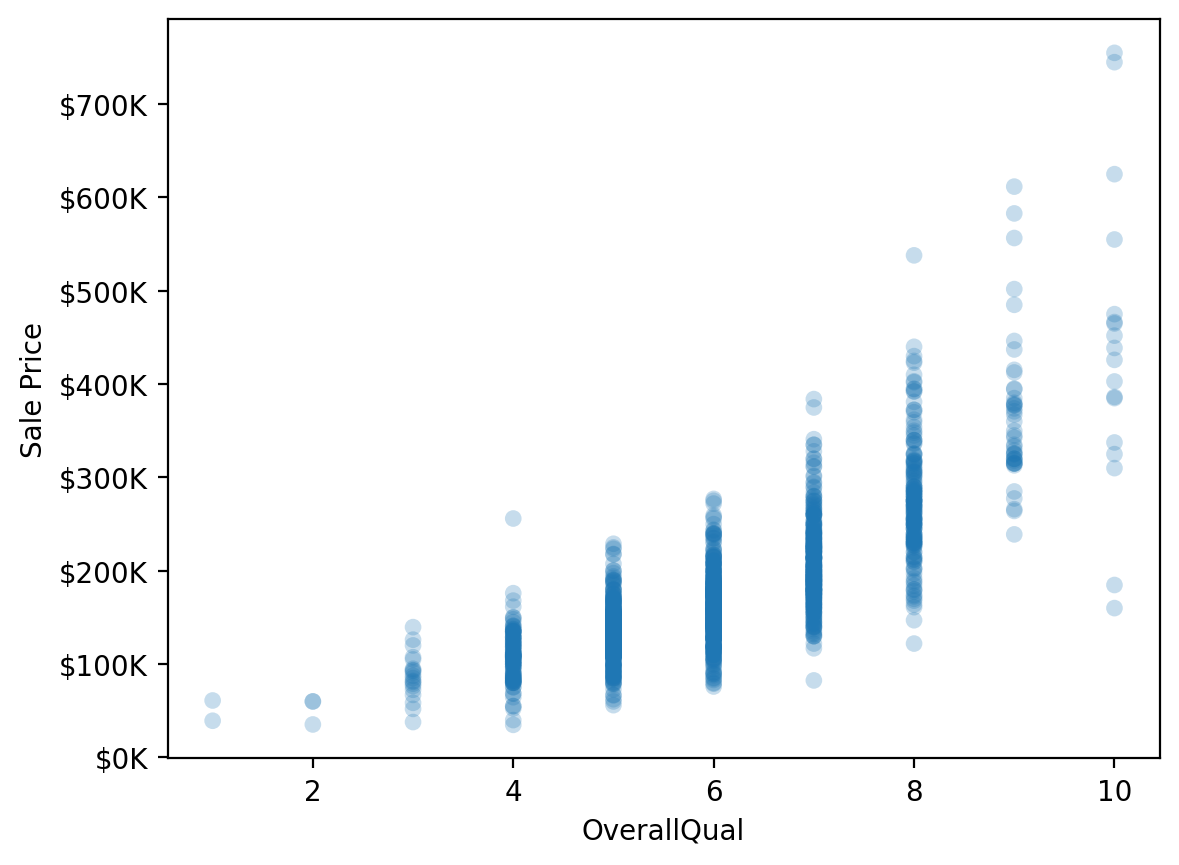

In [111]:
ax = col_vs_price(housing_data, "OverallQual")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

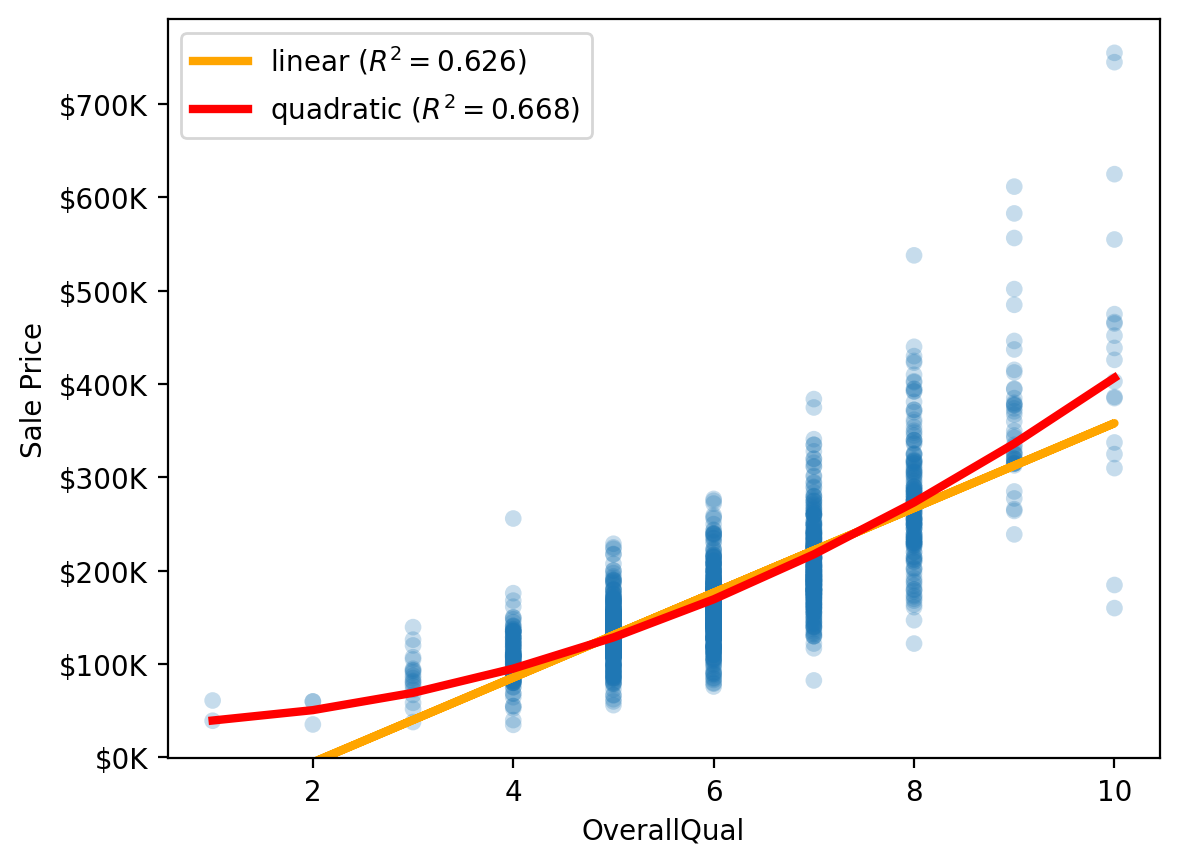

In [112]:
ax = linear_vs_quadratic_plot(housing_data, "OverallQual")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
None

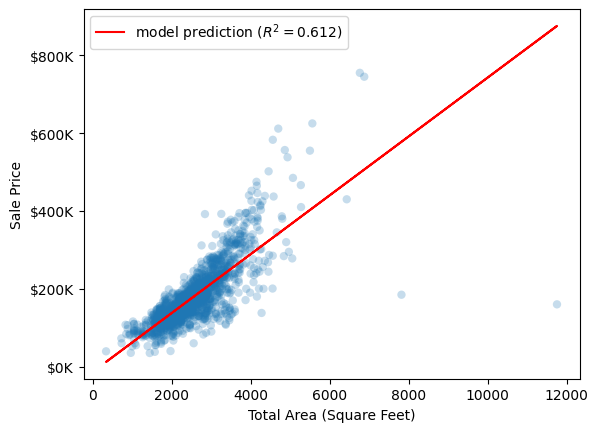

In [59]:
model = LinearRegression()
# Construct our X and y
X = housing_data[["total_area"]]
y = housing_data["SalePrice"]
model = model.fit(X, y)
y_pred = model.predict(X)
ax = plot_area_vs_price(housing_data)
r2 = r2_score(y, y_pred)
ax.plot(
    X.values[:, 0], y_pred, color="red", label=f"model prediction ($R^{2}={r2:.3f})$"
)
ax.legend()
None

## Normalization

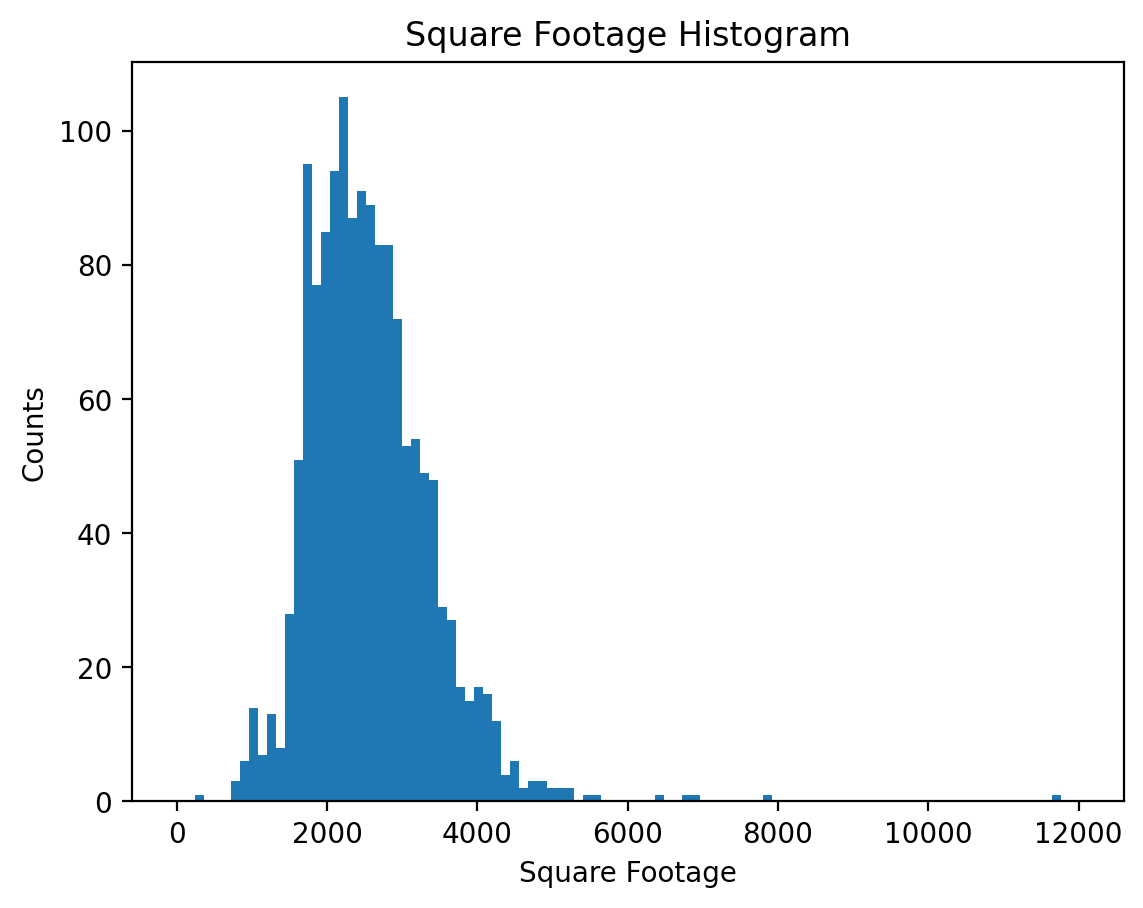

In [120]:
fig, ax = plt.subplots()
ax.hist(housing_data["total_area"], bins=np.linspace(0, 12000, 101))
ax.set_xlabel("Square Footage")
ax.set_ylabel("Counts")
ax.set_title("Square Footage Histogram")
None

Normalization:

$$\vec{\mathbf{X}}^{*}_{j} = \frac{\vec{\mathbf{X}}_{j} - \bar{X}_{j}}{VAR\left( \vec{\mathbf{X}}_{j} \right)}$$

where

$$\bar{X}_{j} = \frac{1}{n}\sum_{i=1}^{n}X_{ij}$$

and 

$$VAR\left({X}_{j}\right) = \frac{1}{n-1}\sum_{i=1}^{n}\left(X_{ij} - \bar{X}_{j}\right)^{2}$$


In [11]:
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

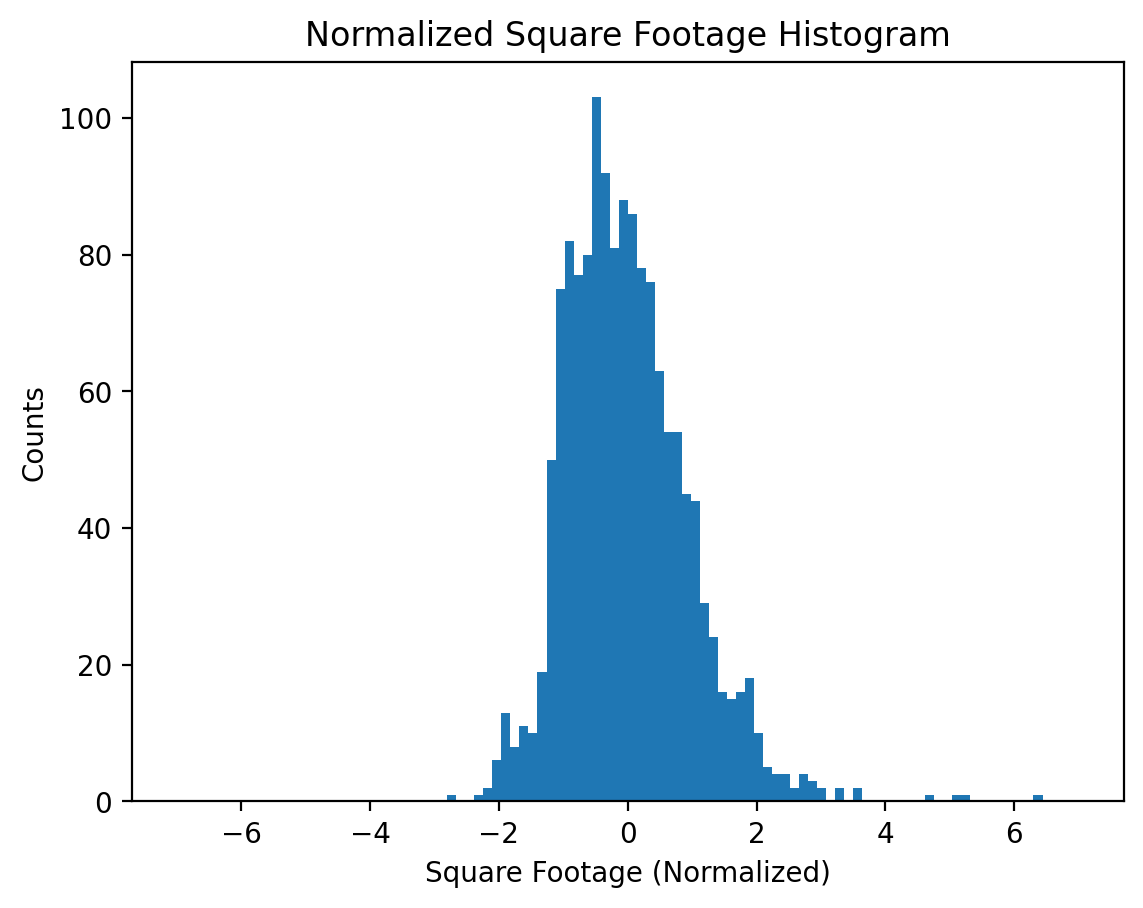

In [121]:
fig, ax = plt.subplots()
ax.hist(normalize(housing_data["total_area"]), bins=np.linspace(-7, 7, 101))
ax.set_xlabel("Square Footage (Normalized)")
ax.set_ylabel("Counts")
ax.set_title("Normalized Square Footage Histogram")
None

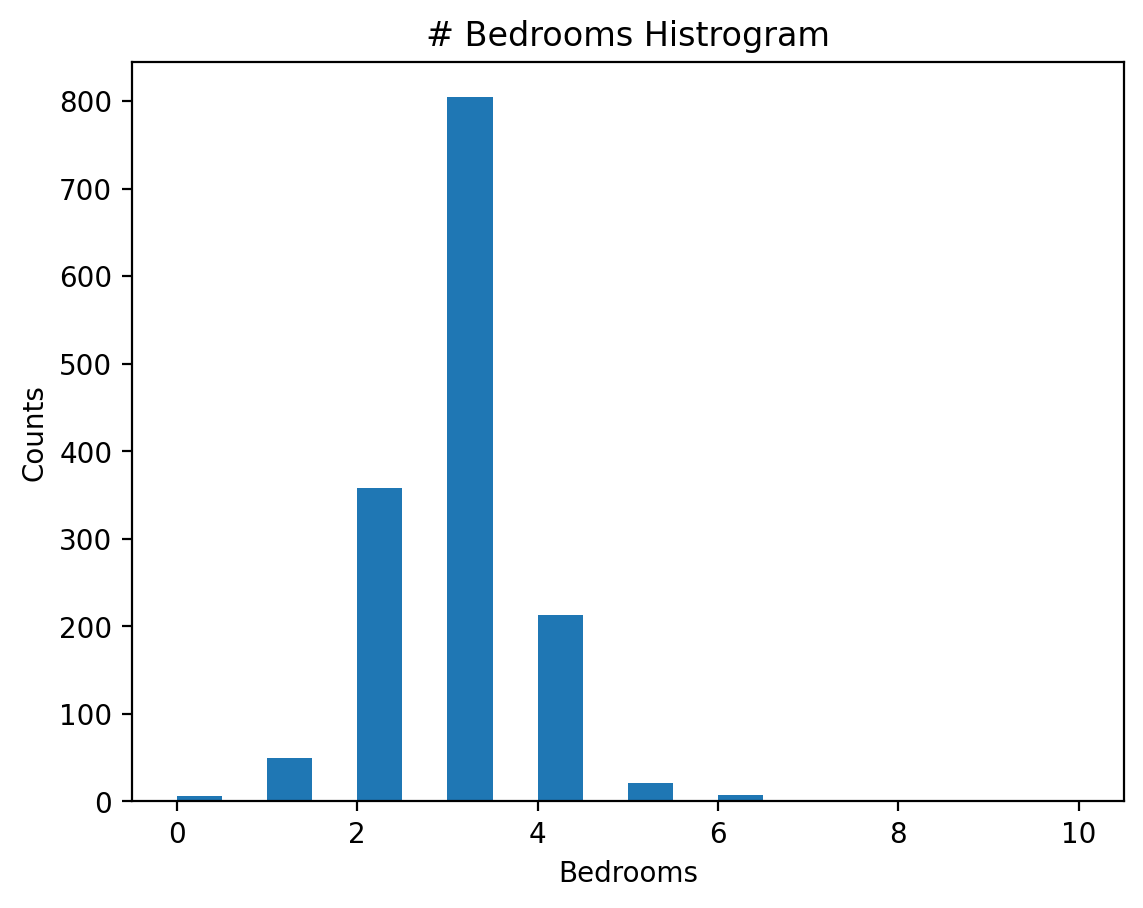

In [117]:
fig, ax = plt.subplots()
ax.hist(housing_data["BedroomAbvGr"], bins=np.linspace(0, 10, 21))
ax.set_ylabel("Counts")
ax.set_xlabel("Bedrooms")
ax.set_title("# Bedrooms Histrogram")
None

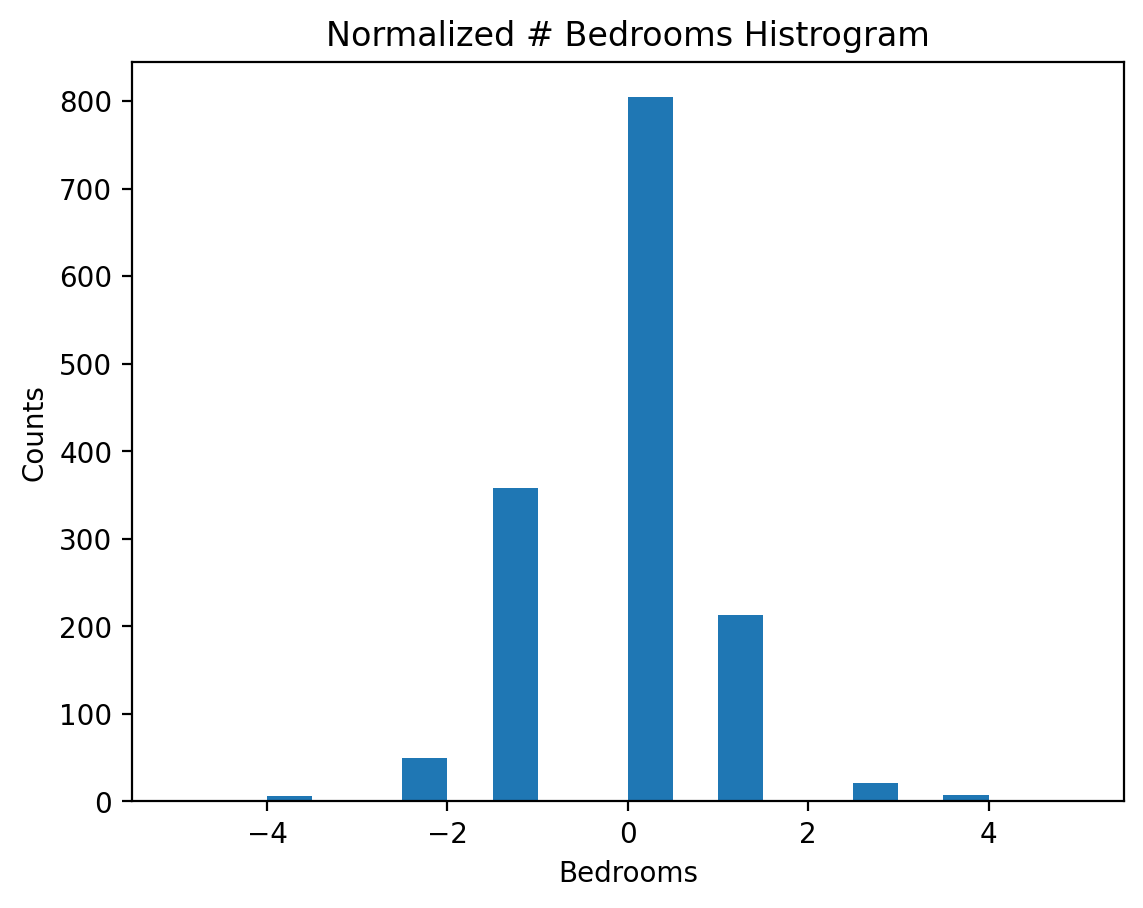

In [119]:
fig, ax = plt.subplots()
ax.hist(normalize(housing_data["BedroomAbvGr"]), bins=np.linspace(-5, 5, 21))
ax.set_ylabel("Counts")
ax.set_xlabel("Bedrooms")
ax.set_title("Normalized # Bedrooms Histrogram")
None

# String Data

## Ordinal Categories

```
ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

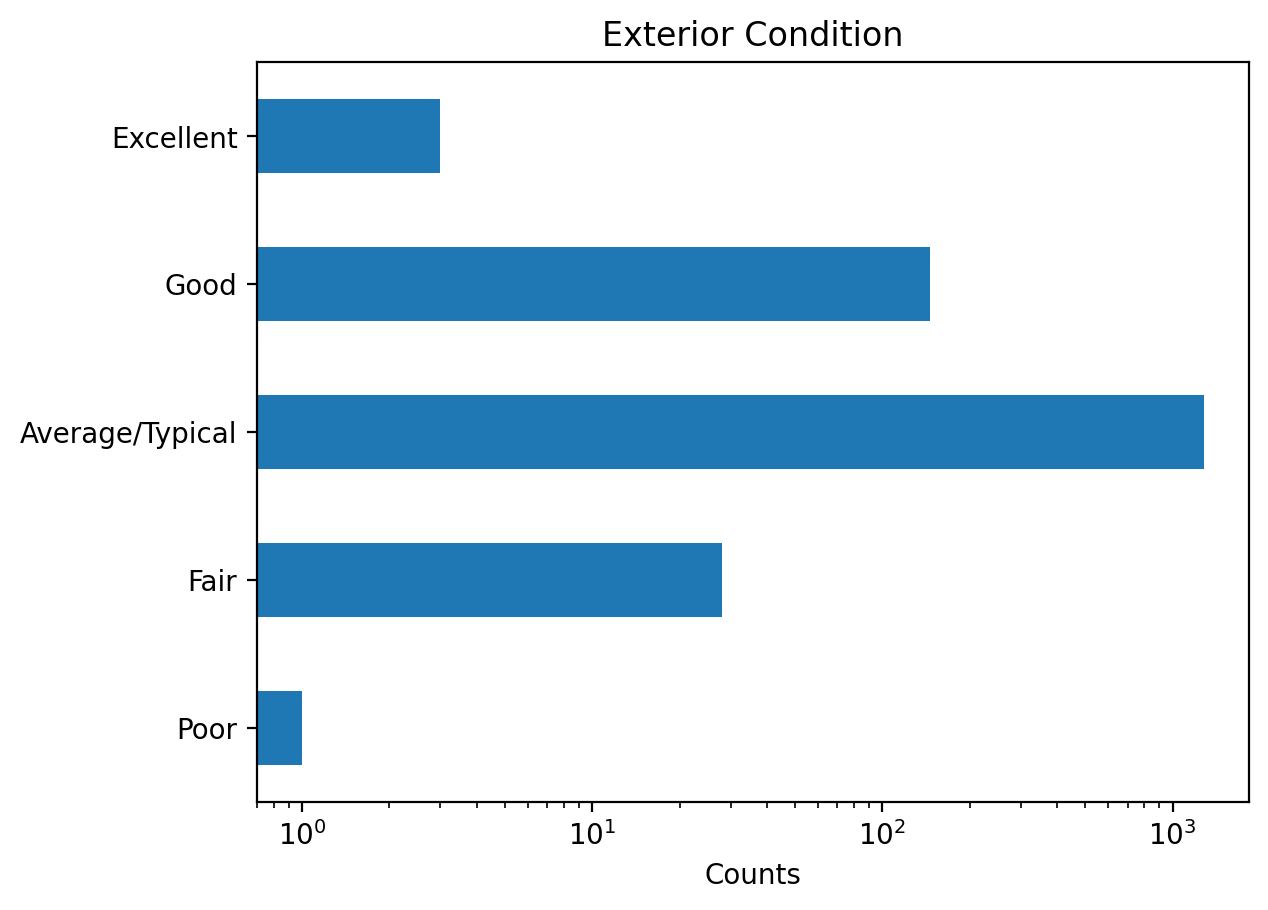

In [157]:
cat_map = {
    "Po": "Poor",
    "Fa": "Fair",
    "TA": "Average/Typical",
    "Gd": "Good",
    "Ex": "Excellent"
}
cat_dtype = pd.CategoricalDtype(list(cat_map.values()), ordered=True)
ax = (
    housing_data["ExterCond"]
    .map(cat_map)
    .astype(cat_dtype)
    .value_counts()
    .sort_index()
    .plot(kind="barh")
)
ax.semilogx()
ax.set_xlabel("Counts")
ax.set_title("Exterior Condition")
None

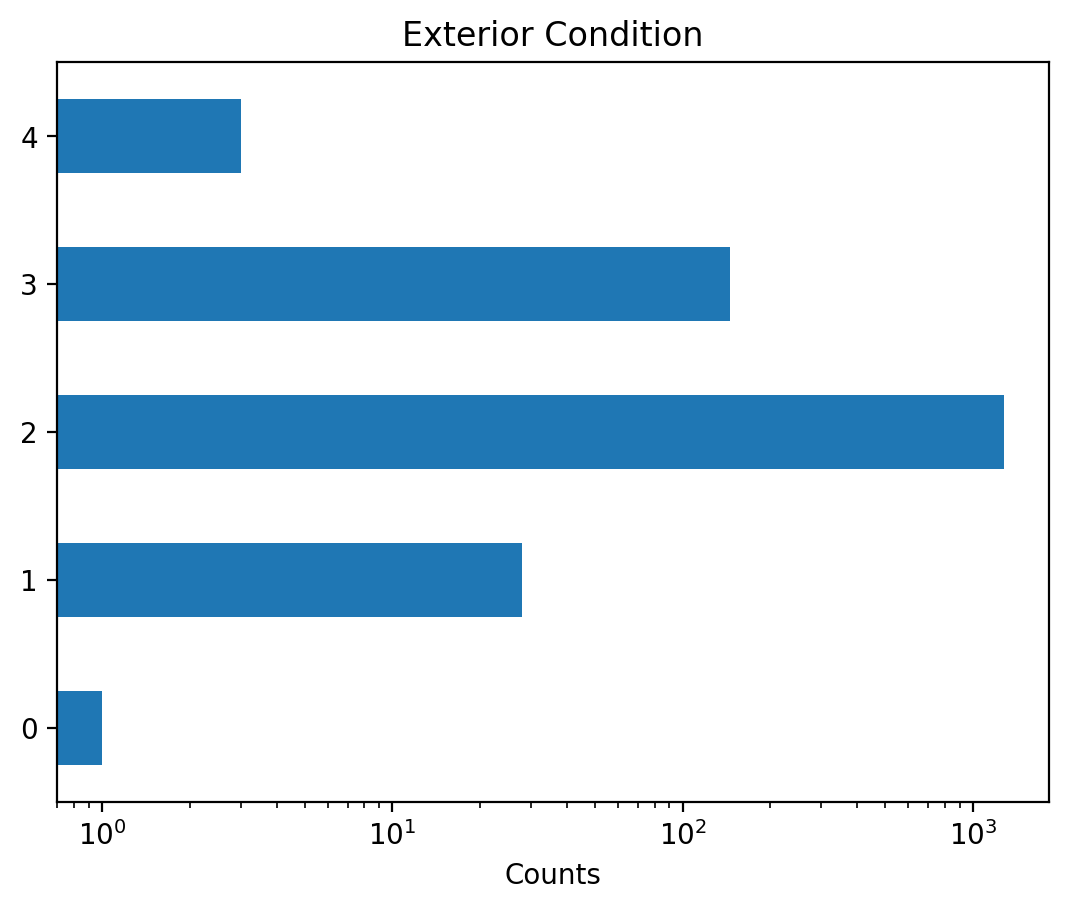

In [158]:
cat_map = {
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
}
cat_dtype = pd.CategoricalDtype(list(cat_map.values()), ordered=True)
ax = (
    housing_data["ExterCond"]
    .map(cat_map)
    .astype(cat_dtype)
    .value_counts()
    .sort_index()
    .plot(kind="barh")
)
ax.semilogx()
ax.set_xlabel("Counts")
ax.set_title("Exterior Condition")
None

## Non-ordinal Categories

```
Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood
```

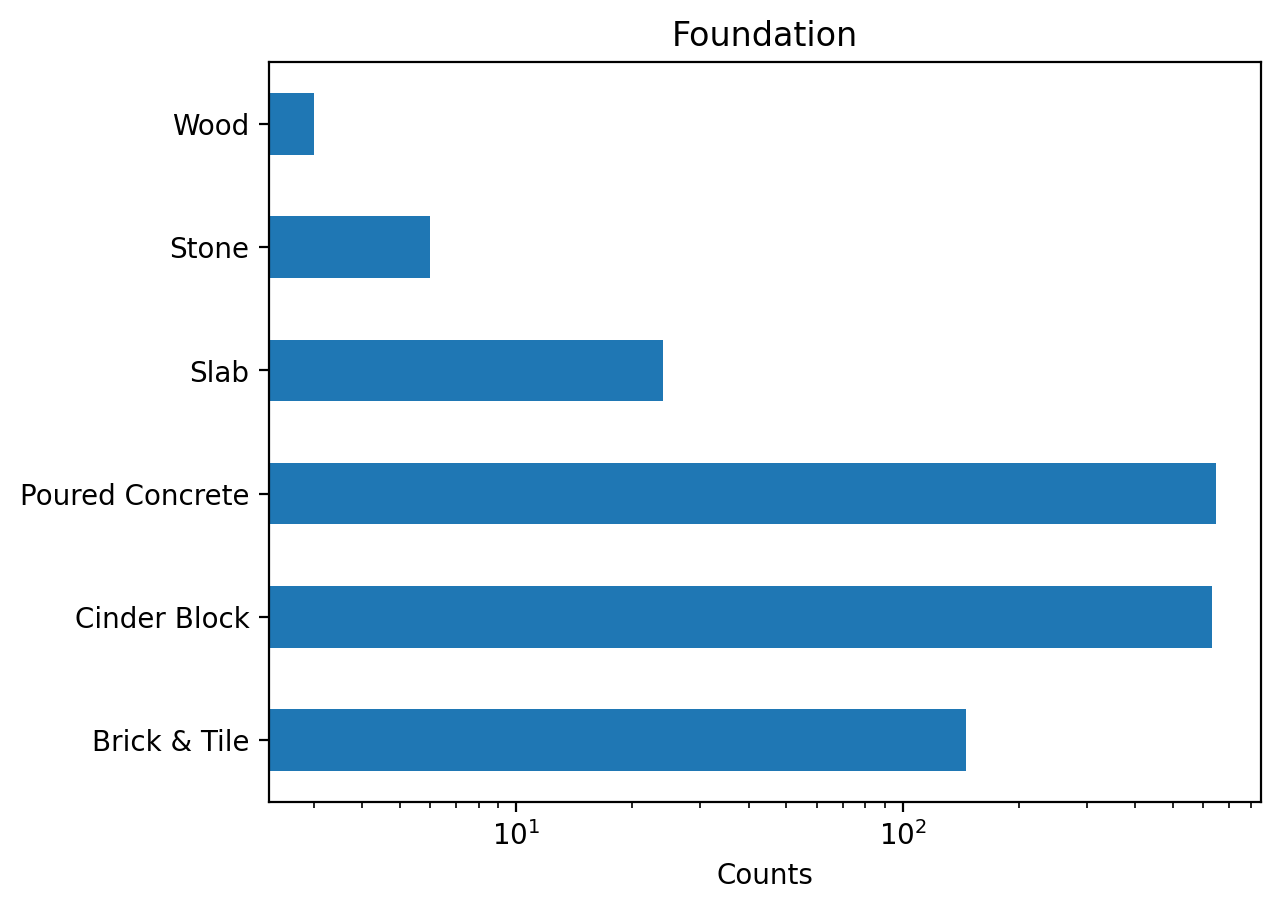

In [162]:

cat_map = {
    "BrkTil": "Brick & Tile",
    "CBlock": "Cinder Block",
    "PConc": "Poured Concrete",
    "Slab": "Slab",
    "Stone": "Stone",
    "Wood": "Wood"
}
cat_dtype = pd.CategoricalDtype(list(cat_map.values()), ordered=True)
ax = (
    housing_data["Foundation"]
    .map(cat_map)
    .astype(cat_dtype)
    .value_counts()
    .sort_index()
    .plot(kind="barh")
)
ax.semilogx()
ax.set_xlabel("Counts")
ax.set_title("Foundation")
None

## Missing Data

In [163]:
housing_data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

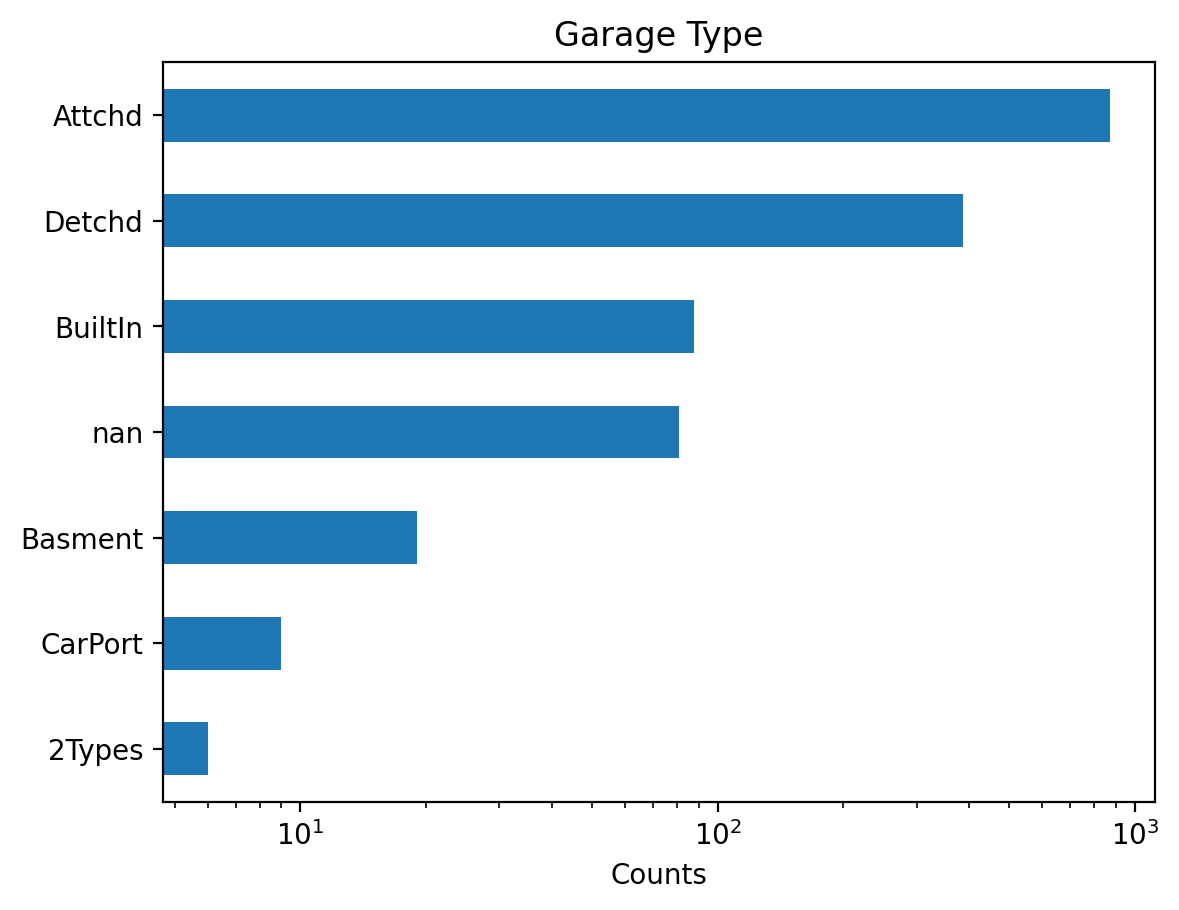

In [168]:
ax = (
    housing_data["GarageType"]
    .value_counts(dropna=False)
    .sort_values()
    .plot(kind="barh")
)
ax.semilogx()
ax.set_xlabel("Counts")
ax.set_title("Garage Type")
None

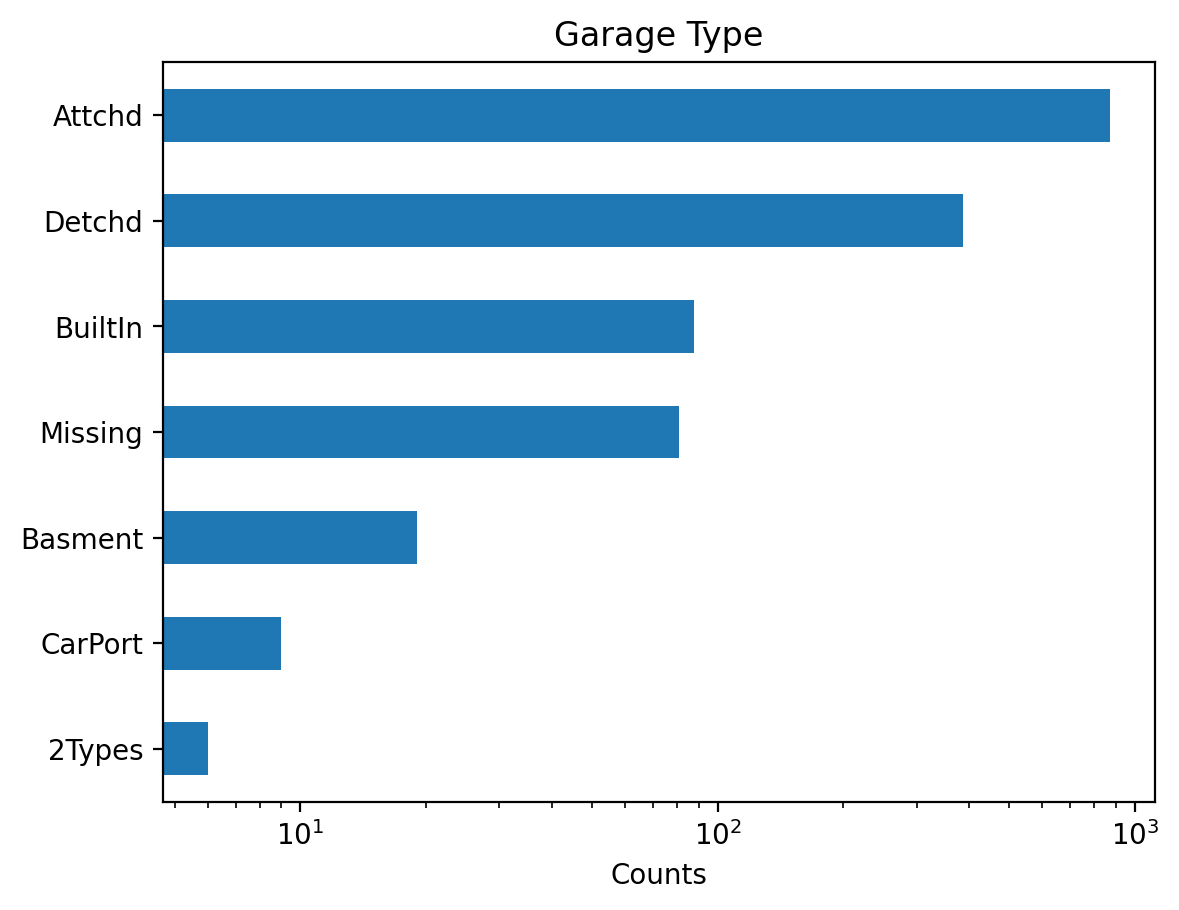

In [169]:
ax = (
    housing_data["GarageType"]
    .fillna("Missing")
    .value_counts(dropna=False)
    .sort_values()
    .plot(kind="barh")
)
ax.semilogx()
ax.set_xlabel("Counts")
ax.set_title("Garage Type")
None

## Model Selection

In [199]:
idx = np.arange(len(housing_data))
np.random.shuffle(idx)
train_frac = 0.1
test_frac = 0.1
train_end = int(train_frac * len(idx))
test_end = train_end + int(test_frac * len(idx))
train, test = (
    housing_data.iloc[:train_end],
    housing_data.iloc[train_end : train_end + test_end],
)

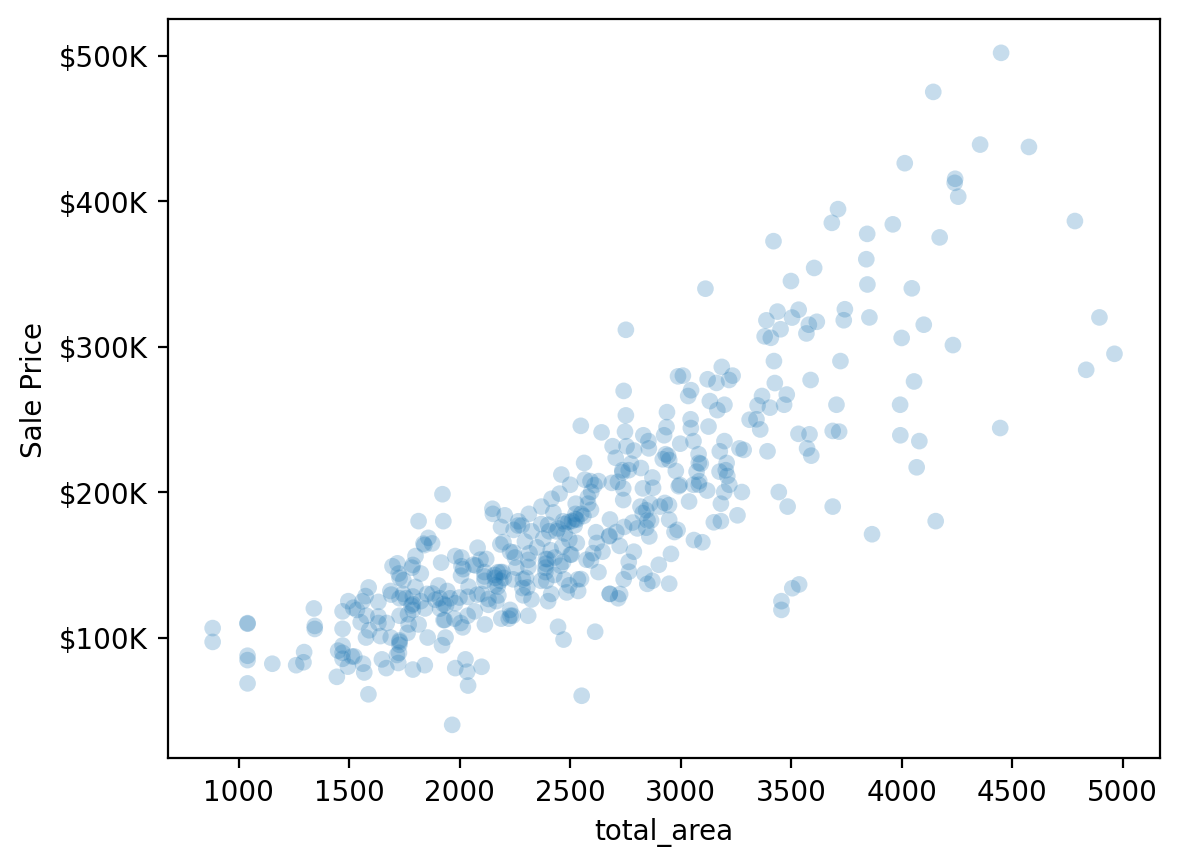

In [205]:
ax = col_vs_price(pd.concat([train, test]), "total_area")
None

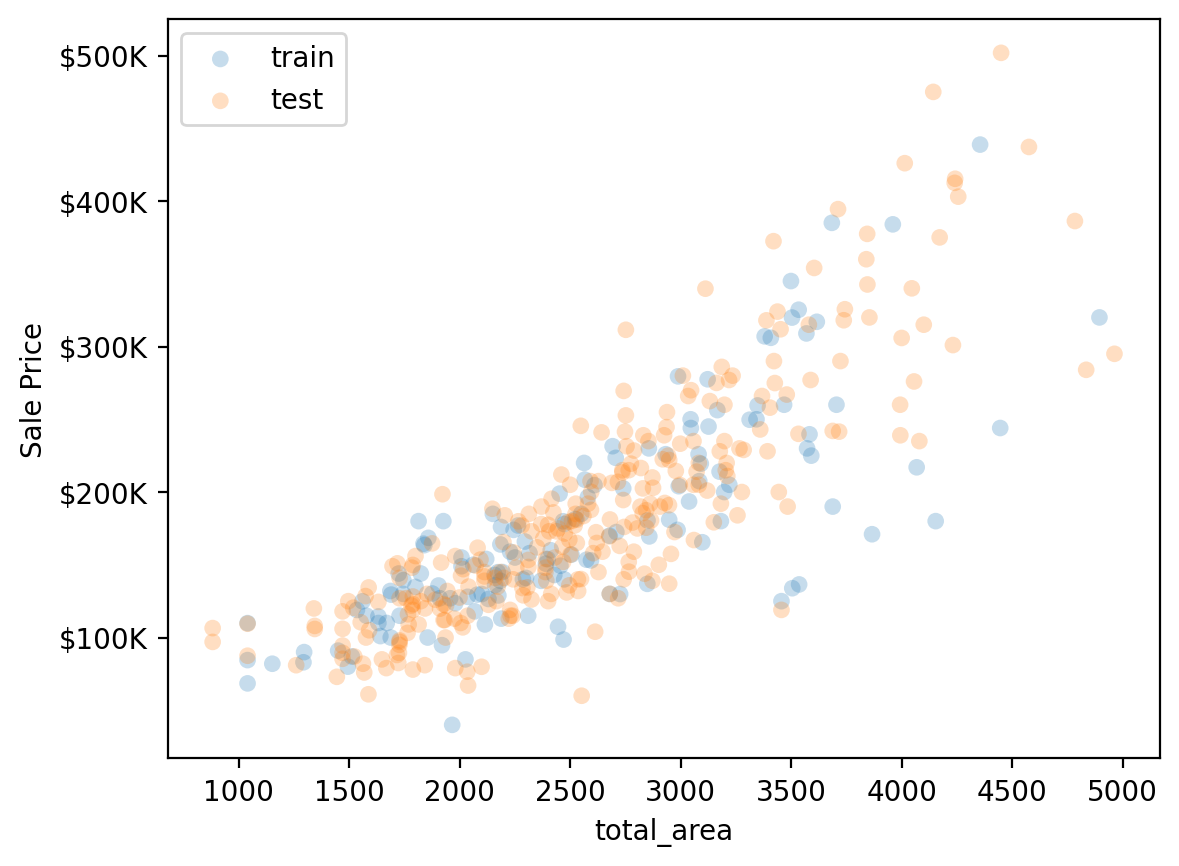

In [203]:
ax = col_vs_price(train, "total_area")
col_vs_price(test, "total_area", ax=ax)
ax.legend(["train", "test"])
None

## Regularization

Recall minimizing Mean Squared Error (MSE) for a linear model:

$$
\begin{aligned}
\mathcal{L} &= \sum_{i=1}^{n}\left(y_{i} - \hat{y}_{i}\right)^{2} \\
\mathcal{L} &= \sum_{i=1}^{n}\left(y_{i} - \vec{\mathbf{X}}_{i} \cdot \vec{\mathbf{\beta}} \right)^{2} \\
\mathcal{L} &= \sum_{i=1}^{n}\left(y_{i} - \vec{\mathbf{X}}_{i} \cdot \vec{\mathbf{\beta}} \right)^{2} + \lambda_{1} \sum_{j=1}^{p}\mathopen|\beta_{j}\mathclose| + \lambda_{2} \sum_{j=1}^{p}\beta_{j}^{2}
\end{aligned}
$$